**Bryce GombaJones  
Prof. Ben Winjum  
August 2, 2024**
#  <center><ins>Disparities in Los Angeles Arrests </ins></center> 

## Preface

During my initial exploration of datasets, I found myself to be the most interested in topics related to social issues regarding race & ethnicity, gender, and class. My prior knowledge of and fascination with sociology as well as its processes is the reason why I leaned towards these topics. I find studying the impact of social influences (i.e. institutions and organizations) on human behavior and interactions to be very interesting. Ultimately, the dataset that I chose to analyze for this final project is a compilation of arrest recordings in LA county from 2020 to present day.


## Introduction

Over the past few decades, statistics have shown that people of color (POC) have been disproportionately affected by systemic inequalities, namely within the criminal justice system. According to the Bureau of Justice Statistics, at the year end of 2022, people who identified as white alone made up 31% of people sentenced to state or federal prison while Black and Hispanic people made up 31% and 23%, respectively. However, that same year, white people made up 58.4% of the total U.S. population while Black and Hispanic people made up only 13.7% and 19.5%, respectively (U.S. Census Bureau). While white people make up more than half of the U.S. population, they are incarcerated in lower proportions than compared to their racial or ethnic counterparts. These citings suggest an inordinate pattern of imprisonment and victimization of POC which may be a result of prejudice somewhere within the criminal justice system.  

 In order to further explore the systemic inequalities that POC face within the criminal justice system, on a smaller scale, we will be analyzing the publicly recorded data on arrests made in Los Angeles county from 2020 to present day. Since arrests are the first process in the criminal justice system, examining them can provide more insight into potential policing malpractices, underlying biases, and the initial stages of racial and ethnic disparities.By focusing on a city known for its racial and ethnic diversity, we aim to address key research questions: Are there disparities in arrest trends among different racial or ethnic groups? Do social factors, such as neighborhoods and demographic profiles, influence policing practices and arrest rates? This project aims to reveal patterns in LA that’re concordant to the broader national trends, while also highlighting any unique local dynamics. 


## Methods

This project visualizes and analyzes a dataset, provided by LAPD and made public by the LA city database, which compiles the recordings of arrests made in Los Angeles county from 2020 to present day. It’s updated weekly and consists of mostly categorical data, including the following columns: 'Type' (indicating whether the individual was booked or released), 'Year' (the year the arrest occurred), 'Area' (the neighborhood or area where the arrest took place), 'Age' (age of the individual at the time of the arrest), 'Sex' (gender of the individual), 'Descent' (racial or ethnic descent of the individual), 'Charge' (the charge related to the arrest), 'Offense' (the type of offense: misdemeanor, felony, infraction, or other), and 'LAT' and 'LON' (latitude and longitude coordinates of the arrest location). Since the dataset was very extensive, the processes of filtering and cleaning the data were utilized in order to better operationalize it. For instance, to filter the data, columns that weren’t pertinent to the research questions mentioned above were omitted. These included ‘Report ID’, ‘Area ID’, ‘Charge Group Code’, etc. These were all obscure numbers or strings which had no importance to the study. Secondly, in the process of cleaning the data, values that were missing from the dataset were either discarded along with its row, or it was filled with the string “Not Recorded”. For example, there were very few entries that did not record either the sex or the descent of the individual which were omitted. But for a larger amount of missing values in the ‘Charge’ column, they were filled with “Not Recorded” because omitting them may have skewed the data.  

After filtering and cleaning the data through google sheets, the downloaded csv file was uploaded to jupyterhub in order to make coding and analysis through the Python notebook possible. Then, importing libraries such as pandas, matplotlib, and numpy was necessary in order to read the csv file, make visualizations, and work with multidimensional data or arrays. With the help from these libraries, visualizations such as line plots, bar graphs, and stacked bar graphs were created to represent the data along with descriptive statistics. Incorporated in the results, the visualizations along with the trend analysis will be found, including yearly trends and percentage calculations.


## Results

In [1]:
# import libraries
import matplotlib.pyplot as plt # plotting
import numpy as np # numerical operations
import pandas as pd 
data = pd.read_csv('final_dataset.csv')
data

,Type,Year,Area,Age,Sex,Descent,Charge,Offense,LAT,LON
0,RELEASED,2024,Hollywood,18,M,Hispanic,Against Family/Child,Infraction,34.1017,-118.3224
1,BOOKED,2024,Newton,25,M,Hispanic,Against Family/Child,Misdemeanor,33.9748,-118.2565
2,RELEASED,2024,Rampart,29,M,Black,Against Family/Child,Misdemeanor,34.0491,-118.2823
3,BOOKED,2024,Newton,58,M,Hispanic,Against Family/Child,Felony,34.0366,-118.2469
4,BOOKED,2024,Foothill,40,M,Other,Against Family/Child,Felony,34.2570,-118.3994
...,...,...,...,...,...,...,...,...,...,...
298753,RELEASED,2020,Northeast,36,M,White,Not Recorded,Misdemeanor,34.0947,-118.2877
298754,RELEASED,2020,Northeast,40,F,White,Not Recorded,Misdemeanor,34.1441,-118.2254
298755,RELEASED,2020,Northeast,48,M,White,Not Recorded,Misdemeanor,34.0935,-118.2866
298756,RELEASED,2020,Northeast,39,F,White,Not Recorded,Misdemeanor,34.1381,-118.1874


In [2]:
print(data.describe(include='all'))

data.info()

          Type           Year     Area            Age     Sex   Descent  \
count   298758  298758.000000   298758  298758.000000  298758    298758   
unique       2            NaN       21            NaN       2         8   
top     BOOKED            NaN  Rampart            NaN       M  Hispanic   
freq    233475            NaN    22746            NaN  237640    153795   
mean       NaN    2021.802151      NaN      35.135166     NaN       NaN   
std        NaN       1.344526      NaN      12.310300     NaN       NaN   
min        NaN    2020.000000      NaN       0.000000     NaN       NaN   
25%        NaN    2021.000000      NaN      26.000000     NaN       NaN   
50%        NaN    2022.000000      NaN      33.000000     NaN       NaN   
75%        NaN    2023.000000      NaN      42.000000     NaN       NaN   
max        NaN    2024.000000      NaN      96.000000     NaN       NaN   

                                Charge  Offense            LAT            LON  
count              

From this sample of entries, one is able to view the columns/variables as well as some of the values that will be used in this analysis. There are also some summary statistics that reveal the most frequent value for each of the columns. Just to name a few, most of the arrests were booked, during 2021, in Rampart, and were individuals of hispanic descent.

In [3]:
male = data[data.Sex == 'M']
female = data[data.Sex == 'F']

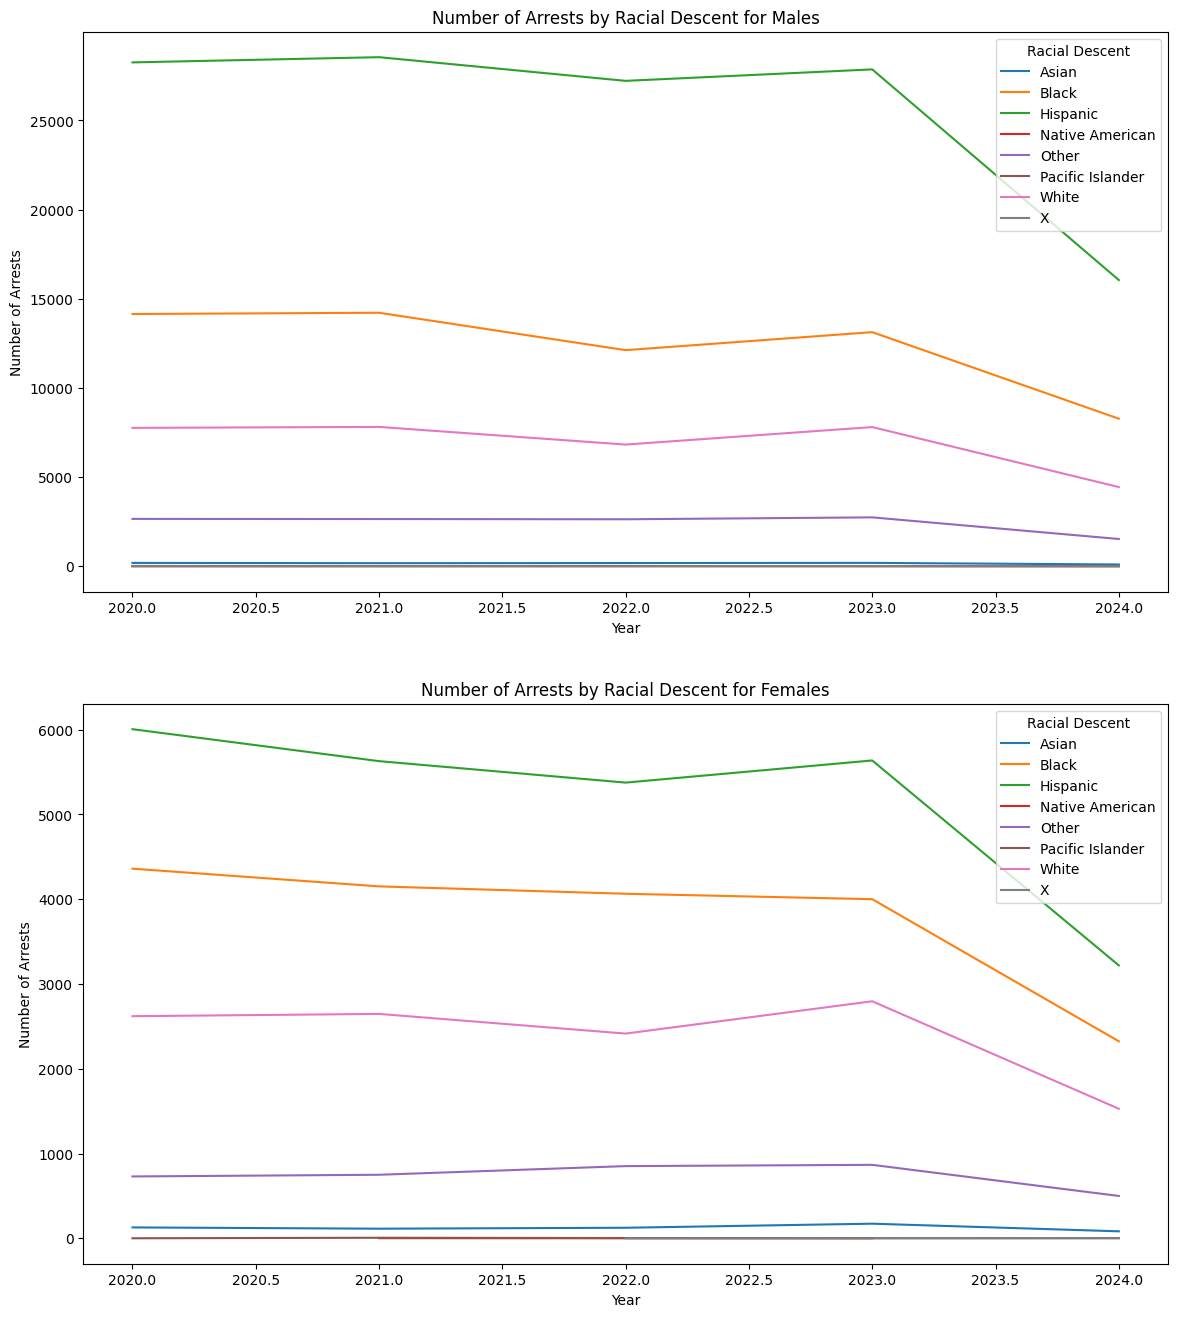

In [4]:
grouped_male = male.groupby(['Year', 'Descent']).size().reset_index(name = 'Count')
pivot_male = grouped_male.pivot(index = 'Year', columns = 'Descent', values = 'Count')

grouped_female = female.groupby(['Year', 'Descent']).size().reset_index(name = 'Count')
pivot_female  = grouped_female.pivot(index = 'Year', columns = 'Descent', values = 'Count')


years_male = pivot_male.index.to_numpy()

descent_columns_male  = pivot_male.columns.to_numpy()
counts_male = pivot_male.to_numpy()

years_female =  pivot_female.index.to_numpy()
descent_columns_female = pivot_female.columns.to_numpy()
counts_female = pivot_female.to_numpy()


fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 16))

# plot for males
for i, descent in enumerate(descent_columns_male):
    
    ax1.plot(years_male, counts_male[:, i], label=descent)

ax1.set_title('Number of Arrests by Racial Descent for Males')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Arrests')
ax1.legend(title = 'Racial Descent')

# plot for females
for i, descent in enumerate(descent_columns_female):
    ax2.plot(years_female, counts_female[:, i], label = descent)

    
    
ax2.set_title('Number of Arrests by Racial Descent for Females')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Arrests')
ax2.legend(title =  'Racial Descent')

plt.show()

These line charts represent the number of arrests made over time, by race. For both males and females, Hispanic people are arrested at the highest rate, followed by black people and then white people. In all cases, the number of arrests are highest in 2020 and then either plateau or decrease, with 2024 having the lowest rate of arrests across all races.

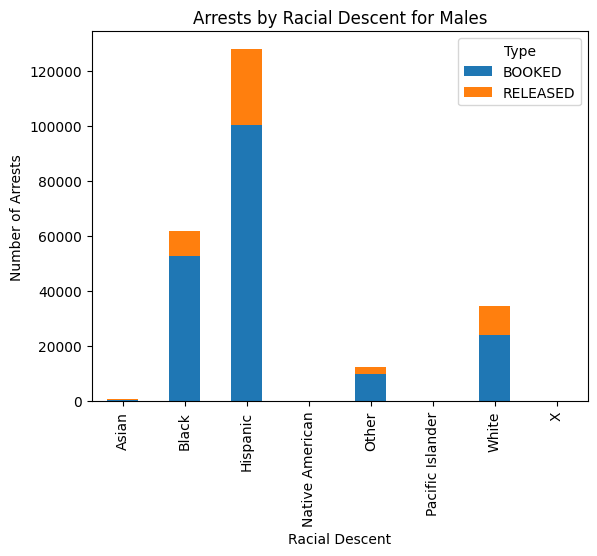

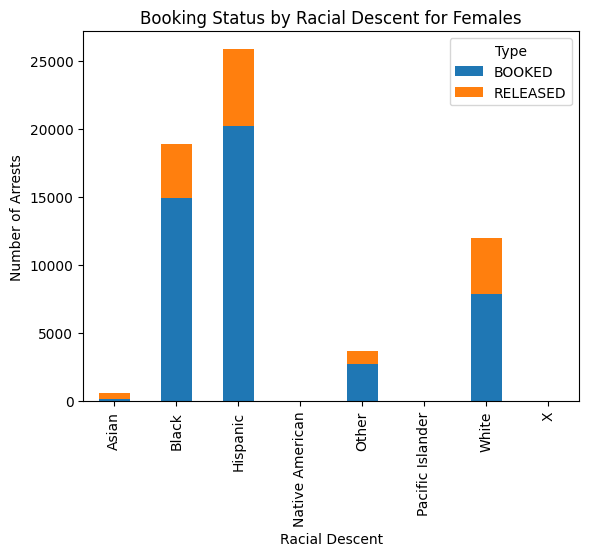

Percentage of Arrests by Racial Descent for Males: Type                 BOOKED   RELEASED
Descent                               
Asian             29.832936  70.167064
Black             85.291836  14.708164
Hispanic          78.573774  21.426226
Native American   90.000000  10.000000
Other             79.754400  20.245600
Pacific Islander  80.952381  19.047619
White             69.837513  30.162487
X                  7.692308  92.307692
Percentage of Arrests by Racial Descent for Females: Type                  BOOKED    RELEASED
Descent                                 
Asian              22.756410   77.243590
Black              78.898354   21.101646
Hispanic           78.177319   21.822681
Native American   100.000000    0.000000
Other              74.236280   25.763720
Pacific Islander  100.000000    0.000000
White              65.575546   34.424454
X                   0.000000  100.000000


In [5]:
grouped_male = male.groupby(['Descent', 'Type']).size().unstack(fill_value = 0)
grouped_female = female.groupby(['Descent', 'Type']).size().unstack(fill_value = 0)

# plot for males 
grouped_male.plot(kind  = 'bar', stacked = True)
plt.title('Arrests by Racial Descent for Males')
plt.xlabel('Racial Descent')
plt.ylabel('Number of Arrests')
plt.show()

# plot for females
grouped_female.plot(kind = 'bar', stacked = True)
plt.title('Booking Status by Racial Descent for Females')
plt.xlabel('Racial Descent')
plt.ylabel('Number of Arrests')
plt.show()


percentages_male = grouped_male.div(grouped_male.sum(axis = 1), axis = 0) * 100

percentages_female =   grouped_female.div(grouped_female.sum(axis = 1), axis = 0) * 100
print("Percentage of Arrests by Racial Descent for Males:", percentages_male)
print("Percentage of Arrests by Racial Descent for Females:", percentages_female)


This set of barcharts represent the number of arrests by racial descent as well as whether the arrest was sent to booking or if the detainee was released from custody. 30% of arrests that involved White men, 21% involving Hispanic men, and 14% involving Black men were released from custody at the time of the arrest. In addition, 21% of arrests involving Black women and Hispanic women were released from custody while 34% of arrests involving white women were released.

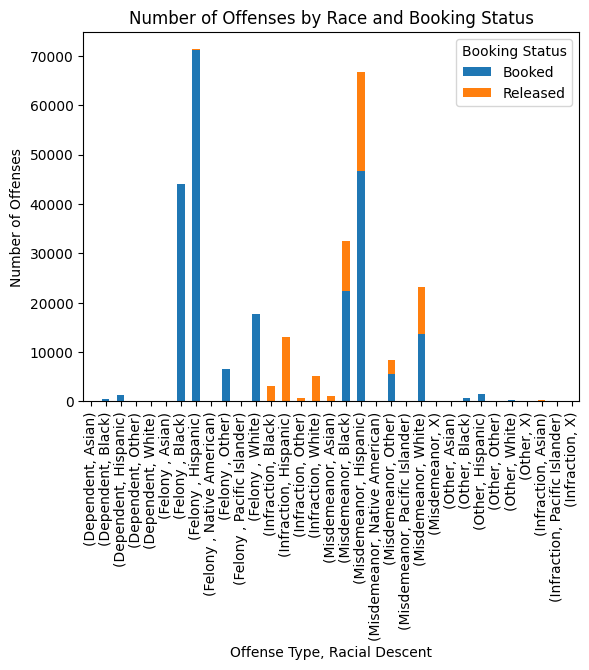

In [6]:
grouped = data.groupby(['Type', 'Offense', 'Descent']).size().unstack(level=[1, 2], fill_value=0)
bookings = grouped.loc['BOOKED']

releases =  grouped.loc['RELEASED']
combined = pd.concat([bookings, releases], axis=1, keys=['Booked', 'Released'])

combined.plot(kind='bar', stacked=True)
plt.title('Number of Offenses by Race and Booking Status')
plt.xlabel('Offense Type, Racial Descent')
plt.ylabel('Number of Offenses')
plt.legend(title='Booking Status')
plt.show()

This stacked bar chart represents the number of releases or bookings by race and offense type. All felonies were taken to booking and a majority of infractions were released. 40% of arrests involving white people charged with misdemeanors got released. 31% and 30% of arrests involving Black people and Hispanic people, respectively, charged with misdemeanors got released. Lastly, 4% of arrests involving Black people charged with infractions go to booking.

In [7]:
misdemeanor = data[data['Offense'] == 'Misdemeanor']
grouped = misdemeanor.groupby(['Descent', 'Type']).size().unstack(fill_value=0)
total_by_race = grouped.sum(axis = 1)

percentages = grouped.div(total_by_race, axis = 0) * 100


print("Percentage of Misdemeanors by Race and Status:")
print(percentages)

Percentage of Misdemeanors by Race and Status:
Type                 BOOKED   RELEASED
Descent                               
Asian             18.982387  81.017613
Black             69.000000  31.000000
Hispanic          69.986339  30.013661
Native American   87.500000  12.500000
Other             67.816505  32.183495
Pacific Islander  75.757576  24.242424
White             59.144505  40.855495
X                  7.142857  92.857143


In [8]:
infractions = data[data['Offense'] == 'Infraction']

grouped = infractions.groupby(['Descent', 'Type']).size().unstack(fill_value=0)

total_by_race = grouped.sum(axis=1)

percentages = grouped.div(total_by_race, axis=0) * 100


print("Percentage of Infractions by Race and Status:")
print(percentages)

Percentage of Infractions by Race and Status:
Type                BOOKED    RELEASED
Descent                               
Asian             0.000000  100.000000
Black             4.172015   95.827985
Hispanic          0.466682   99.533318
Other             0.811908   99.188092
Pacific Islander  0.000000  100.000000
White             0.687083   99.312917
X                 0.000000  100.000000


This stacked bar chart represents the number of releases or bookings by race and offense type. All felonies were taken to booking and a majority of infractions were released. 40% of arrests involving white people charged with misdemeanors got released. 31% and 30% of arrests involving Black people and Hispanic people, respectively, charged with misdemeanors got released. Lastly, 4% of arrests involving Black people charged with infractions go to booking.

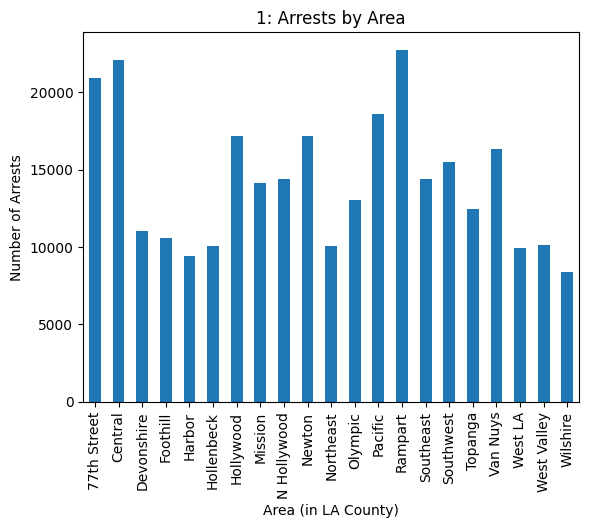

In [9]:
arrests_by_area = data['Area'].value_counts()
arrests_by_area = arrests_by_area.sort_index()

arrests_by_area.plot(kind = 'bar')


plt.title('1: Arrests by Area')
plt.xlabel('Area (in LA County)')
plt.ylabel('Number of Arrests')



plt.show()

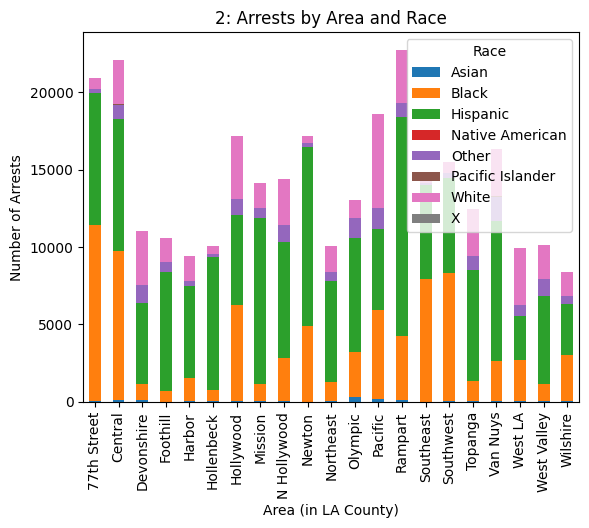

In [10]:
race_by_area = data.groupby(['Area', 'Descent']).size().unstack(fill_value = 0)

race_by_area = race_by_area.sort_index()


race_by_area.plot(kind = 'bar', stacked = True,)
plt.title('2: Arrests by Area and Race')
plt.xlabel('Area (in LA County)')
plt.ylabel('Number of Arrests')
plt.legend(title = 'Race')


plt.show()

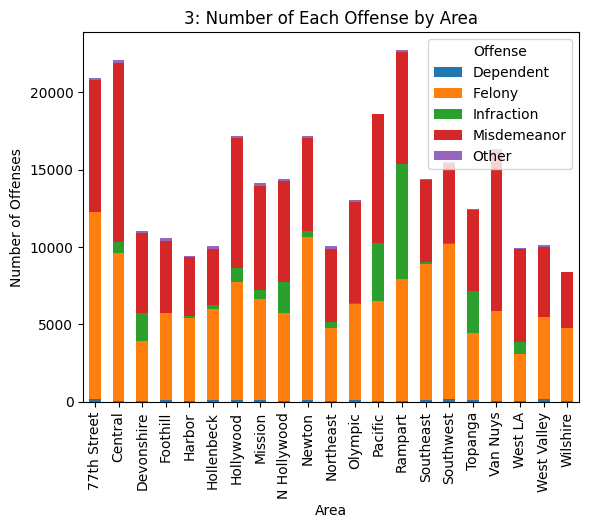

In [11]:
offenses_by_area = data.groupby(['Area', 'Offense']).size().unstack(fill_value=0)
offenses_by_area = offenses_by_area.sort_index()

offenses_by_area.plot(kind ='bar', stacked = True)
plt.title('3: Number of Each Offense by Area')

plt.xlabel('Area')
plt.ylabel('Number of Offenses')
plt.legend(title = 'Offense')
plt.show()


All three of these Figures show the amount of arrests by Area. With just over 20k, the most arrests were made on 77th street, in Central LA, and Rampart. The second one expands on the first by visualizing  how many of each race was arrested in each area. 

## Discussion

This analysis reveals a consistent pattern in the arrest rates among different racial and ethnic groups. Hispanic people are arrested at the highest rate, followed by Black and then White people. This trend aligns with national data, which often shows a disproportionate impact of the criminal justice system on people of color. Additionally, the analysis of booking and release rates by race shows notable inequalities. For instance, a higher percentage of white people are released from custody at the time of the arrest compared to Black and Hispanic people.   

Specifically, 30% of arrests involving White men result in release, compared to 21% for Hispanic men and 14% for Black men. This disparity is also evident among women, with a higher percentage of White women being released compared to their Black and Hispanic counterparts. These findings suggest that there may be differential treatment in the decision-making process at the point of arrest. Factors such as perceived risk and socioeconomic status could influence these outcomes. This disparity raises concerns about potential biases in arrest processes and the need for further investigation into the factors driving these differences.  

The data on offenses and their outcomes suggests that felonies are predominantly booked, while infractions are mostly released. This trend is expected, as the severity of the offense dictates the processing outcome. However, the percentage of misdemeanor arrests resulting in release varies by race. White people charged with misdemeanors have a higher release rate (40%) compared to Black (31%) and Hispanic (30%) people. Also, although it's not as significant, 4% of black people are booked for infraction offenses while every other race is released at 99-100%. This also signifies a sort of disparity.  

The spatial analysis of arrests shows that areas like 77th Street, Central LA, and Rampart have the highest number of arrests. These areas also show significant racial and ethnic variations in arrest rates. Such disparities could be indicative of varying levels of policing across neighborhoods. It is crucial to examine whether these patterns reflect targeted policing practices or broader community characteristics.  

The findings from this analysis highlight the need for ongoing examination of arrest practices and outcomes within the criminal justice system. The observed inequalities in arrest rates, booking and release decisions, and geographical patterns suggest that there may be systemic biases that affect people of color disproportionately, maybe even more in diverse cities like Los Angeles. Future research should aim to explore the factors contributing to these disparities in greater detail. By addressing these issues further, we can work towards a more just and equitable society, where arrest and incarceration rates reflect fairness rather than systemic inequality.


## Works Cited

https://data.lacity.org/Public-Safety/Arrest-Data-from-2020-to-Present/amvf-fr72/about_data (dataset)  

E. Ann Carson. “Prisons Report Series: Preliminary Data Release.” Bureau of Justice Statistics,   
https://bjs.ojp.gov/library/publications/prisons-report-series-preliminary-data-release#:~:text=At%20yearend%202022%2C%2032%25%20of,Hawaiian%2C%20or%20Other%20Pacific%20Islander. 

U.S. Census Bureau Quickfacts: United States, www.census.gov/quickfacts/fact/table/US/PST045219. Accessed 2 Aug. 2024. 